In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ny=21
# Nx=19
# ##First step ends at
# Nx1=4
# ##Second step ends at
# Nx2=8
# Ny1=5
# ##Third step ends at
# Nx3=12
# Ny2=10
# ##Fourth step ends at
# Ny3=16

In [2]:
Ny=21
Nx=19
##First step ends at
Nx1=4
##Second step ends at
Nx2=8
Ny1=5
##Third step ends at
Nx3=12
Ny2=10
##Fourth step ends at
Ny3=16
##Macroscopic property
##density field
rho=np.ones((Ny,Nx),dtype=float)
##velocity field
u=np.zeros((Ny,Nx),dtype=float)
v=np.zeros((Ny,Nx),dtype=float)
##lattice parameters
omega=1.40
csq=1/3
##Initiliase velocity field
##Top lid is moving with velocity 0.005 to right
u_top1=0.001
u_top2=0.001
u_top3=0.001
u_top4=0.001
u[0,1:Nx1]=u_top1
u[Ny1,Nx1+1:Nx2]=u_top2
u[Ny2,Nx2+1:Nx3]=u_top3
u[Ny3,Nx3+1:Nx-1]=u_top4
##Initialise local particle distribution function
f0=np.zeros((Ny,Nx),dtype=float)
f1=np.zeros((Ny,Nx),dtype=float)
f2=np.zeros((Ny,Nx),dtype=float)
f3=np.zeros((Ny,Nx),dtype=float)
f4=np.zeros((Ny,Nx),dtype=float)
f5=np.zeros((Ny,Nx),dtype=float)
f6=np.zeros((Ny,Nx),dtype=float)
f7=np.zeros((Ny,Nx),dtype=float)
f8=np.zeros((Ny,Nx),dtype=float)
##post collision local particle distribution function
f0c=np.zeros((Ny,Nx),dtype=float)
f1c=np.zeros((Ny,Nx),dtype=float)
f2c=np.zeros((Ny,Nx),dtype=float)
f3c=np.zeros((Ny,Nx),dtype=float)
f4c=np.zeros((Ny,Nx),dtype=float)
f5c=np.zeros((Ny,Nx),dtype=float)
f6c=np.zeros((Ny,Nx),dtype=float)
f7c=np.zeros((Ny,Nx),dtype=float)
f8c=np.zeros((Ny,Nx),dtype=float)
##Weights od digital particles
w0=4/9
w1=1/9
w2=1/9
w3=1/9
w4=1/9
w5=1/36
w6=1/36
w7=1/36
w8=1/36
##Initilaise equilibrium distribution function
f0eq=np.zeros((Ny,Nx),dtype=np.float64)
f1eq=np.zeros((Ny,Nx),dtype=np.float64)
f2eq=np.zeros((Ny,Nx),dtype=np.float64)
f3eq=np.zeros((Ny,Nx),dtype=np.float64)
f4eq=np.zeros((Ny,Nx),dtype=np.float64)
f5eq=np.zeros((Ny,Nx),dtype=np.float64)
f6eq=np.zeros((Ny,Nx),dtype=np.float64)
f7eq=np.zeros((Ny,Nx),dtype=np.float64)
f8eq=np.zeros((Ny,Nx),dtype=np.float64)
##compute equilibrium distribution function
# f0eq=(-1+u**2+csq)*(-1+v**2+csq)*rho
# f1eq=-0.5*(u+u**2+csq)*(-1+v**2+csq)*rho
# f2eq=-0.5*(-u+u**2+csq)*(-1+v**2+csq)*rho
# f3eq=-0.5*(-1+u**2+csq)*(v+v**2+csq)*rho
# f4eq=-0.5*(-1+u**2+csq)*(-v+v**2+csq)*rho
# f5eq=0.25*(u+u**2+csq)*(v+v**2+csq)*rho
# f6eq=0.25*(-u+u**2+csq)*(-v+v**2+csq)*rho
# f7eq=0.25*(-u+u**2+csq)*(v+v**2+csq)*rho
# f8eq=0.25*(u+u**2+csq)*(-v+v**2+csq)*rho
f0eq=w0*rho*(1-0.5*((u**2+v**2)/csq))
f1eq=w1*rho*(1+u/csq+0.5*(u**2/csq**2)-0.5*((u**2+v**2)/csq))
f2eq=w2*rho*(1-u/csq+0.5*(u**2/csq**2)-0.5*((u**2+v**2)/csq))
f3eq=w3*rho*(1-v/csq+0.5*(v**2/csq**2)-0.5*((u**2+v**2)/csq))
f4eq=w4*rho*(1+v/csq+0.5*(v**2/csq**2)-0.5*((u**2+v**2)/csq))
f5eq=w5*rho*(1+(u-v)/csq+0.5*((u-v)**2/csq**2)-0.5*((u**2+v**2)/csq))
f6eq=w6*rho*(1+(v-u)/csq+0.5*((v-u)**2/csq**2)-0.5*((u**2+v**2)/csq))
f7eq=w7*rho*(1-(u+v)/csq+0.5*((u+v)**2/csq**2)-0.5*((u**2+v**2)/csq))
f8eq=w8*rho*(1+(u+v)/csq+0.5*((u+v)**2/csq**2)-0.5*((u**2+v**2)/csq))
##Initialisation of equilibrium functions
f0=f0eq
f1=f1eq
f2=f2eq
f3=f3eq
f4=f4eq
f5=f5eq
f6=f6eq
f7=f7eq
f8=f8eq

In [3]:
##Collision of digital particles
for i in np.arange(1,Ny1+1):
    for j in np.arange(1,Nx1):
        f0c[i,j]=f0[i,j]+omega*(f0eq[i,j]-f0[i,j])
        f1c[i,j]=f1[i,j]+omega*(f1eq[i,j]-f1[i,j])
        f2c[i,j]=f2[i,j]+omega*(f2eq[i,j]-f2[i,j])
        f3c[i,j]=f3[i,j]+omega*(f3eq[i,j]-f3[i,j])
        f4c[i,j]=f4[i,j]+omega*(f4eq[i,j]-f4[i,j])
        f5c[i,j]=f5[i,j]+omega*(f5eq[i,j]-f5[i,j])
        f6c[i,j]=f6[i,j]+omega*(f6eq[i,j]-f6[i,j])
        f7c[i,j]=f7[i,j]+omega*(f7eq[i,j]-f7[i,j])
        f8c[i,j]=f8[i,j]+omega*(f8eq[i,j]-f8[i,j])
        
        
for i in np.arange(Ny1+1,Ny2+1):
    for j in np.arange(1,Nx2):
        f0c[i,j]=f0[i,j]+omega*(f0eq[i,j]-f0[i,j])
        f1c[i,j]=f1[i,j]+omega*(f1eq[i,j]-f1[i,j])
        f2c[i,j]=f2[i,j]+omega*(f2eq[i,j]-f2[i,j])
        f3c[i,j]=f3[i,j]+omega*(f3eq[i,j]-f3[i,j])
        f4c[i,j]=f4[i,j]+omega*(f4eq[i,j]-f4[i,j])
        f5c[i,j]=f5[i,j]+omega*(f5eq[i,j]-f5[i,j])
        f6c[i,j]=f6[i,j]+omega*(f6eq[i,j]-f6[i,j])
        f7c[i,j]=f7[i,j]+omega*(f7eq[i,j]-f7[i,j])
        f8c[i,j]=f8[i,j]+omega*(f8eq[i,j]-f8[i,j])
        
for i in np.arange(Ny2+1,Ny3+1):
    for j in np.arange(1,Nx3):
        f0c[i,j]=f0[i,j]+omega*(f0eq[i,j]-f0[i,j])
        f1c[i,j]=f1[i,j]+omega*(f1eq[i,j]-f1[i,j])
        f2c[i,j]=f2[i,j]+omega*(f2eq[i,j]-f2[i,j])
        f3c[i,j]=f3[i,j]+omega*(f3eq[i,j]-f3[i,j])
        f4c[i,j]=f4[i,j]+omega*(f4eq[i,j]-f4[i,j])
        f5c[i,j]=f5[i,j]+omega*(f5eq[i,j]-f5[i,j])
        f6c[i,j]=f6[i,j]+omega*(f6eq[i,j]-f6[i,j])
        f7c[i,j]=f7[i,j]+omega*(f7eq[i,j]-f7[i,j])
        f8c[i,j]=f8[i,j]+omega*(f8eq[i,j]-f8[i,j])
        
        
for i in np.arange(Ny3+1,Ny-1):
    for j in np.arange(1,Nx-1):
        f0c[i,j]=f0[i,j]+omega*(f0eq[i,j]-f0[i,j])
        f1c[i,j]=f1[i,j]+omega*(f1eq[i,j]-f1[i,j])
        f2c[i,j]=f2[i,j]+omega*(f2eq[i,j]-f2[i,j])
        f3c[i,j]=f3[i,j]+omega*(f3eq[i,j]-f3[i,j])
        f4c[i,j]=f4[i,j]+omega*(f4eq[i,j]-f4[i,j])
        f5c[i,j]=f5[i,j]+omega*(f5eq[i,j]-f5[i,j])
        f6c[i,j]=f6[i,j]+omega*(f6eq[i,j]-f6[i,j])
        f7c[i,j]=f7[i,j]+omega*(f7eq[i,j]-f7[i,j])
        f8c[i,j]=f8[i,j]+omega*(f8eq[i,j]-f8[i,j])
        
        
        
 
##North boundary moving 1
i=0
for j in np.arange(1,Nx1):
    f0c[i,j]=f0[i,j]
    f1c[i,j]=f1[i,j]
    f2c[i,j]=f2[i,j]
    f3c[i,j]=f3[i,j]
    f4c[i,j]=f4[i,j]
    f5c[i,j]=f5[i,j]
    f6c[i,j]=f6[i,j]
    f7c[i,j]=f7[i,j]
    f8c[i,j]=f8[i,j]
    
##North boundary moving 2
i=Ny1
for j in np.arange(Nx1+1,Nx2):
    f0c[i,j]=f0[i,j]
    f1c[i,j]=f1[i,j]
    f2c[i,j]=f2[i,j]
    f3c[i,j]=f3[i,j]
    f4c[i,j]=f4[i,j]
    f5c[i,j]=f5[i,j]
    f6c[i,j]=f6[i,j]
    f7c[i,j]=f7[i,j]
    f8c[i,j]=f8[i,j]
    
##North boundary moving 3
i=Ny2
for j in np.arange(Nx2+1,Nx3):
    f0c[i,j]=f0[i,j]
    f1c[i,j]=f1[i,j]
    f2c[i,j]=f2[i,j]
    f3c[i,j]=f3[i,j]
    f4c[i,j]=f4[i,j]
    f5c[i,j]=f5[i,j]
    f6c[i,j]=f6[i,j]
    f7c[i,j]=f7[i,j]
    f8c[i,j]=f8[i,j]

    
##North boundary moving 4
i=Ny3
for j in np.arange(Nx3+1,Nx-1):
    f0c[i,j]=f0[i,j]
    f1c[i,j]=f1[i,j]
    f2c[i,j]=f2[i,j]
    f3c[i,j]=f3[i,j]
    f4c[i,j]=f4[i,j]
    f5c[i,j]=f5[i,j]
    f6c[i,j]=f6[i,j]
    f7c[i,j]=f7[i,j]
    f8c[i,j]=f8[i,j]

    
    
##South boundary 
i=Ny-1
for j in np.arange(0,Nx):
    f0c[i,j]=f0[i,j]
    f1c[i,j]=f1[i,j]
    f2c[i,j]=f2[i,j]
    f3c[i,j]=f3[i,j]
    f4c[i,j]=f4[i,j]
    f5c[i,j]=f5[i,j]
    f6c[i,j]=f6[i,j]
    f7c[i,j]=f7[i,j]
    f8c[i,j]=f8[i,j]

    
    
##West boundary
j=0
for i in np.arange(0,Ny-1):
    f0c[i,j]=f0[i,j]
    f1c[i,j]=f1[i,j]
    f2c[i,j]=f2[i,j]
    f3c[i,j]=f3[i,j]
    f4c[i,j]=f4[i,j]
    f5c[i,j]=f5[i,j]
    f6c[i,j]=f6[i,j]
    f7c[i,j]=f7[i,j]
    f8c[i,j]=f8[i,j]

    
##East boundary 1
j=Nx1
for i in np.arange(0,Ny1+1):
    f0c[i,j]=f0[i,j]
    f1c[i,j]=f1[i,j]
    f2c[i,j]=f2[i,j]
    f3c[i,j]=f3[i,j]
    f4c[i,j]=f4[i,j]
    f5c[i,j]=f5[i,j]
    f6c[i,j]=f6[i,j]
    f7c[i,j]=f7[i,j]
    f8c[i,j]=f8[i,j]

    
##East boundary 2
j=Nx2
for i in np.arange(Ny1,Ny2+1):
    f0c[i,j]=f0[i,j]
    f1c[i,j]=f1[i,j]
    f2c[i,j]=f2[i,j]
    f3c[i,j]=f3[i,j]
    f4c[i,j]=f4[i,j]
    f5c[i,j]=f5[i,j]
    f6c[i,j]=f6[i,j]
    f7c[i,j]=f7[i,j]
    f8c[i,j]=f8[i,j]

    
##East boundary 3
j=Nx3
for i in np.arange(Ny2,Ny3+1):
    f0c[i,j]=f0[i,j]
    f1c[i,j]=f1[i,j]
    f2c[i,j]=f2[i,j]
    f3c[i,j]=f3[i,j]
    f4c[i,j]=f4[i,j]
    f5c[i,j]=f5[i,j]
    f6c[i,j]=f6[i,j]
    f7c[i,j]=f7[i,j]
    f8c[i,j]=f8[i,j]

    
##East boundary 4
j=Nx-1
for i in np.arange(Ny3,Ny-1):
    f0c[i,j]=f0[i,j]
    f1c[i,j]=f1[i,j]
    f2c[i,j]=f2[i,j]
    f3c[i,j]=f3[i,j]
    f4c[i,j]=f4[i,j]
    f5c[i,j]=f5[i,j]
    f6c[i,j]=f6[i,j]
    f7c[i,j]=f7[i,j]
    f8c[i,j]=f8[i,j]
    
    
    
    
##Streaming of digital particles
##Streaming of digital particles
##digital particle 0 is at rest
f0=f0c
##digital particle 1 which moves with velocity (0,1)
for i in np.arange(0,Ny1):
    for j in np.arange(0,Nx1):
        f1[i,j+1]=f1c[i,j]
    
for i in np.arange(Ny1,Ny2):
    for j in np.arange(0,Nx2+1):
        f1[i,j+1]=f1c[i,j]

    
for i in np.arange(Ny2,Ny3):
    for j in np.arange(0,Nx3):
        f1[i,j+1]=f1c[i,j]

for i in np.arange(Ny3,Ny):
    for j in np.arange(0,Nx-1):
        f1[i,j+1]=f1c[i,j]

##digital particle 2 which moves with velocity (0,-1)
for i in np.arange(0,Ny1):
    for j in np.arange(0,Nx1):
        f2[i,j]=f2c[i,j+1]

for i in np.arange(Ny1,Ny2):
    for j in np.arange(0,Nx2):
        f2[i,j]=f2c[i,j+1]

for i in np.arange(Ny2,Ny3):
    for j in np.arange(0,Nx3):
        f2[i,j]=f2c[i,j+1]

for i in np.arange(Ny3,Ny):
    for j in np.arange(0,Nx-1):
        f2[i,j]=f2c[i,j+1]



##digital particle 3 which moves with velocity (-1,0)
for j in np.arange(0,Nx1+1):
    for i in np.arange(0,Ny-1):
        f3[i,j]=f3c[i+1,j]
        

for j in np.arange(Nx1+1,Nx2+1):
    for i in np.arange(Ny1,Ny-1):
        f3[i,j]=f3c[i+1,j]


        

for j in np.arange(Nx2+1,Nx3):
    for i in np.arange(Ny2,Ny-1):
        f3[i,j]=f3c[i+1,j]

for j in np.arange(Nx3+1,Nx):
    for i in np.arange(Ny3,Ny-1):
        f3[i,j]=f3c[i+1,j]


##digital particle 4 which moves with velocity (1,0)
for j in np.arange(0,Nx1+1):
    for i in np.arange(0,Ny-1):
        f4[i+1,j]=f4c[i,j]


for j in np.arange(Nx1+1,Nx2+1):
    for i in np.arange(Ny1,Ny-1):
        f4[i+1,j]=f4c[i,j]

for j in np.arange(Nx2+1,Nx3+1):
    for i in np.arange(Ny2,Ny-1):
        f4[i+1,j]=f4c[i,j]


for j in np.arange(Nx3+1,Nx):
    for i in np.arange(Ny3,Ny-1):
        f4[i+1,j]=f4c[i,j]


##digital particle 5 which moves with velocity (-1,1)
for i in np.arange(0,Ny1):
    for j in np.arange(0,Nx1):
        f5[i,j+1]=f5c[i+1,j]


for i in np.arange(Ny1,Ny3):
    for j in np.arange(0,Nx2):
        f5[i,j+1]=f5c[i+1,j]


for i in np.arange(Ny2,Ny3):
    for j in np.arange(0,Nx3):
        f5[i,j+1]=f5c[i+1,j]

for i in np.arange(Ny3,Ny-1):
    for j in np.arange(0,Nx-1):
        f5[i,j+1]=f5c[i+1,j]

##digital particle 6 which moves with velocity (1,-1)
for i in np.arange(0,Ny1):
    for j in np.arange(0,Nx1):
        f6[i+1,j]=f6c[i,j+1]

for i in np.arange(Ny1,Ny2):
    for j in np.arange(0,Nx2):
        f6[i+1,j]=f6c[i,j+1]


for i in np.arange(Ny2,Ny3):
    for j in np.arange(0,Nx3):
        f6[i+1,j]=f6c[i,j+1]


for i in np.arange(Ny3,Ny-1):
    for j in np.arange(0,Nx-1):
        f6[i+1,j]=f6c[i,j+1]

##digital particle 7 which moves with velocity (-1,-1)
for i in np.arange(0,Ny1):
    for j in np.arange(0,Nx1):
        f7[i,j]=f7c[i+1,j+1]


for i in np.arange(Ny1,Ny2):
    for j in np.arange(0,Nx2):
        f7[i,j]=f7c[i+1,j+1]



for i in np.arange(Ny2,Ny3):
    for j in np.arange(0,Nx3):
        f7[i,j]=f7c[i+1,j+1]


for i in np.arange(Ny3,Ny-1):
    for j in np.arange(0,Nx-1):
        f7[i,j]=f7c[i+1,j+1]



##digital particle 8 which moves with velocity (1,1)
for i in np.arange(0,Ny1):
    for j in np.arange(0,Nx1):
        f8[i+1,j+1]=f8c[i,j]


for i in np.arange(Ny1,Ny2):
    for j in np.arange(0,Nx2):
        f8[i+1,j+1]=f8c[i,j]

for i in np.arange(Ny2,Ny3):
    for j in np.arange(0,Nx3):
        f8[i+1,j+1]=f8c[i,j]

for i in np.arange(Ny3,Ny-1):
    for j in np.arange(0,Nx-1):
        f8[i+1,j+1]=f8c[i,j]



##Boundary condition
##bottom wall is stationary
i=Ny-1
j=0
f1[i,j]=f2[i,j]
f3[i,j]=f4[i,j]
f5[i,j]=f6[i,j]
f8[i,j]=0.5*(rho[i,j]-(f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]))
f7[i,j]=f8[i,j]

i=Ny-1
for j in np.arange(1,Nx-1):
    f3[i,j]=f4[i,j]
    f5[i,j]=f6[i,j]
    f7[i,j]=f8[i,j]


i=Ny-1
j=Nx-1
f2[i,j]=f1[i,j]
f3[i,j]=f4[i,j]
f7[i,j]=f8[i,j]
f6[i,j]=0.5*(rho[i,j]-(f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f7[i,j]+f8[i,j]))
f5[i,j]=f6[i,j]

##West wall
##corner lattice node
i=0
j=0
f1[0,0]=f2[0,0]
f4[0,0]=f3[0,0]
f8[0,0]=f7[0,0]
f6[0,0]=0.5*(rho[0,0]-(f0[0,0]+f1[0,0]+f2[0,0]+f3[0,0]+f4[0,0]+f7[0,0]+f8[0,0]))
f5[0,0]=f6[0,0]

##interior lattice node
j=0
for i in np.arange(1,Ny-1):
    f1[i,j]=f2[i,j]
    f5[i,j]=f6[i,j]
    f8[i,j]=f7[i,j]
    

##East wall 1
i=0
j=Nx1
f2[i,j]=f1[i,j]
f4[i,j]=f3[i,j]
f6[i,j]=f5[i,j]
f8[i,j]=0.5*(rho[i,j]-(f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]))
f7[i,j]=f8[i,j]

j=Nx1
for i in np.arange(1,Ny1):
    f2[i,j]=f1[i,j]
    f6[i,j]=f5[i,j]
    f7[i,j]=f8[i,j]
    
    
i=Ny1
j=Nx1
f6[i,j]=f5[i,j]

##East wall 2
i=Ny1
j=Nx2
f2[i,j]=f1[i,j]
f4[i,j]=f3[i,j]
f6[i,j]=f5[i,j]
f8[i,j]=0.5*(rho[i,j]-(f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]))
f7[i,j]=f8[i,j]


j=Nx2
for i in np.arange(Ny1+1,Ny2):
    f2[i,j]=f1[i,j]
    f6[i,j]=f5[i,j]
    f7[i,j]=f8[i,j]
    
    
    
    
i=Ny2
j=Nx2
f6[i,j]=f5[i,j]

##East wall 3
i=Ny2
j=Nx3
f2[i,j]=f1[i,j]
f4[i,j]=f3[i,j]
f6[i,j]=f5[i,j]
f8[i,j]=0.5*(rho[i,j]-(f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]))
f7[i,j]=f8[i,j]


j=Nx3
for i in np.arange(Ny2+1,Ny3):
    f2[i,j]=f1[i,j]
    f6[i,j]=f5[i,j]
    f7[i,j]=f8[i,j]
    
    
    
    
i=Ny3
j=Nx3
f6[i,j]=f5[i,j]

##East wall 4
i=Ny3
j=Nx-1
f2[i,j]=f1[i,j]
f4[i,j]=f3[i,j]
f6[i,j]=f5[i,j]
f8[i,j]=0.5*(rho[i,j]-(f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]))
f7[i,j]=f8[i,j]

j=Nx-1
for i in np.arange(Ny3+1,Ny-1):
    f2[i,j]=f1[i,j]
    f6[i,j]=f5[i,j]
    f7[i,j]=f8[i,j]
    
    
##Moving north walls

##North wall 1

i=0
for j in np.arange(1,Nx1):
    rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+2*(f3[i,j]+f5[i,j]+f7[i,j])
    f4[i,j]=f3[i,j]
    f6[i,j]=f5[i,j]-(w5*rho[i,j]*2*u_top1)/csq
    f8[i,j]=f7[i,j]+(w7*rho[i,j]*2*u_top1)/csq

##North wall 2
i=Ny1
for j in np.arange(Nx1+1,Nx2):
    rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+2*(f3[i,j]+f5[i,j]+f7[i,j])
    f4[i,j]=f3[i,j]
    f6[i,j]=f5[i,j]-(w5*rho[i,j]*2*u_top1)/csq
    f8[i,j]=f7[i,j]+(w7*rho[i,j]*2*u_top1)/csq



##North wall 3
i=Ny2
for j in np.arange(Nx2+1,Nx3):
    rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+2*(f3[i,j]+f5[i,j]+f7[i,j])
    f4[i,j]=f3[i,j]
    f6[i,j]=f5[i,j]-(w5*rho[i,j]*2*u_top1)/csq
    f8[i,j]=f7[i,j]+(w7*rho[i,j]*2*u_top1)/csq


##North wall 4
i=Ny3
for j in np.arange(Nx3+1,Nx-1):
    rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+2*(f3[i,j]+f5[i,j]+f7[i,j])
    f4[i,j]=f3[i,j]
    f6[i,j]=f5[i,j]-(w5*rho[i,j]*2*u_top1)/csq
    f8[i,j]=f7[i,j]+(w7*rho[i,j]*2*u_top1)/csq

        
##Compute macroscopic property    
for i in np.arange(1,Ny1+1):
    for j in np.arange(1,Nx1):
        rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j]
        u[i,j]=(1/rho[i,j])*(f1[i,j]+f5[i,j]+f8[i,j]-(f2[i,j]+f6[i,j]+f7[i,j]))
        v[i,j]=(1/rho[i,j])*(f4[i,j]+f6[i,j]+f8[i,j]-(f3[i,j]+f5[i,j]+f7[i,j]))
   
        
        
for i in np.arange(Ny1+1,Ny2+1):
    for j in np.arange(1,Nx2):
        rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j]
        u[i,j]=(1/rho[i,j])*(f1[i,j]+f5[i,j]+f8[i,j]-(f2[i,j]+f6[i,j]+f7[i,j]))
        v[i,j]=(1/rho[i,j])*(f4[i,j]+f6[i,j]+f8[i,j]-(f3[i,j]+f5[i,j]+f7[i,j]))

        
for i in np.arange(Ny2+1,Ny3+1):
    for j in np.arange(1,Nx3):
        rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j]
        u[i,j]=(1/rho[i,j])*(f1[i,j]+f5[i,j]+f8[i,j]-(f2[i,j]+f6[i,j]+f7[i,j]))
        v[i,j]=(1/rho[i,j])*(f4[i,j]+f6[i,j]+f8[i,j]-(f3[i,j]+f5[i,j]+f7[i,j]))
 
        
        
for i in np.arange(Ny3+1,Ny-1):
    for j in np.arange(1,Nx-1):
        rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j]
        u[i,j]=(1/rho[i,j])*(f1[i,j]+f5[i,j]+f8[i,j]-(f2[i,j]+f6[i,j]+f7[i,j]))
        v[i,j]=(1/rho[i,j])*(f4[i,j]+f6[i,j]+f8[i,j]-(f3[i,j]+f5[i,j]+f7[i,j]))
        
        
##north boundary 1
i=0
for j in np.arange(1,Nx1):
    u[i,j]=u_top1
    v[i,j]=0

##north boundary 2
i=Ny1
for j in np.arange(Nx1+1,Nx2):
    u[i,j]=u_top2
    v[i,j]=0


##north boundary 3
i=Ny2
for j in np.arange(Nx2+1,Nx3):
    u[i,j]=u_top3
    v[i,j]=0

##north boundary 4
i=Ny3
for j in np.arange(Nx3+1,Nx-1):
    u[i,j]=u_top4
    v[i,j]=0

##South
i=Ny-1
for j in np.arange(0,Nx):
    u[i,j]=0
    v[i,j]=0

##West
j=0
for i in np.arange(0,Ny-1):
    u[i,j]=0
    v[i,j]=0

##East boundary 1
j=Nx1
for i in np.arange(0,Ny1+1):
    u[i,j]=0
    v[i,j]=0

##East boundary 2
j=Nx2
for i in np.arange(Ny1,Ny2+1):
    u[i,j]=0
    v[i,j]=0


##East boundary 3
j=Nx3
for i in np.arange(Ny2,Ny3+1):
    u[i,j]=0
    v[i,j]=0

##East boundary 4
j=Nx-1
for i in np.arange(Ny3,Ny-1):
    u[i,j]=0
    v[i,j]=0



In [4]:
iter=5000
while(iter>=1):
    ##Compute equilibrium distribution function
    
    for i in np.arange(1,Ny1+1):
        for j in np.arange(1,Nx1):
            f0eq[i,j]=w0*rho[i,j]*(1-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f1eq[i,j]=w1*rho[i,j]*(1+u[i,j]/csq+0.5*(u[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f2eq[i,j]=w2*rho[i,j]*(1-u[i,j]/csq+0.5*(u[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f3eq[i,j]=w3*rho[i,j]*(1-v[i,j]/csq+0.5*(v[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f4eq[i,j]=w4*rho[i,j]*(1+v[i,j]/csq+0.5*(v[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f5eq[i,j]=w5*rho[i,j]*(1+(u[i,j]-v[i,j])/csq+0.5*((u[i,j]-v[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f6eq[i,j]=w6*rho[i,j]*(1+(v[i,j]-u[i,j])/csq+0.5*((v[i,j]-u[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f7eq[i,j]=w7*rho[i,j]*(1-(u[i,j]+v[i,j])/csq+0.5*((u[i,j]+v[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f8eq[i,j]=w8*rho[i,j]*(1+(u[i,j]+v[i,j])/csq+0.5*((u[i,j]+v[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
#             f0eq[i,j]=(-1+u[i,j]**2+csq)*(-1+v[i,j]**2+csq)*rho[i,j]
#             f1eq[i,j]=-0.5*(u[i,j]+u[i,j]**2+csq)*(-1+v[i,j]**2+csq)*rho[i,j]
#             f2eq[i,j]=-0.5*(-u[i,j]+u[i,j]**2+csq)*(-1+v[i,j]**2+csq)*rho[i,j]
#             f3eq[i,j]=-0.5*(-1+u[i,j]**2+csq)*(v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f4eq[i,j]=-0.5*(-1+u[i,j]**2+csq)*(-v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f5eq[i,j]=0.25*(u[i,j]+u[i,j]**2+csq)*(v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f6eq[i,j]=0.25*(-u[i,j]+u[i,j]**2+csq)*(-v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f7eq[i,j]=0.25*(-u[i,j]+u[i,j]**2+csq)*(v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f8eq[i,j]=0.25*(u[i,j]+u[i,j]**2+csq)*(-v[i,j]+v[i,j]**2+csq)*rho[i,j]

        
    for i in np.arange(Ny1+1,Ny2+1):
        for j in np.arange(1,Nx2):
            f0eq[i,j]=w0*rho[i,j]*(1-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f1eq[i,j]=w1*rho[i,j]*(1+u[i,j]/csq+0.5*(u[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f2eq[i,j]=w2*rho[i,j]*(1-u[i,j]/csq+0.5*(u[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f3eq[i,j]=w3*rho[i,j]*(1-v[i,j]/csq+0.5*(v[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f4eq[i,j]=w4*rho[i,j]*(1+v[i,j]/csq+0.5*(v[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f5eq[i,j]=w5*rho[i,j]*(1+(u[i,j]-v[i,j])/csq+0.5*((u[i,j]-v[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f6eq[i,j]=w6*rho[i,j]*(1+(v[i,j]-u[i,j])/csq+0.5*((v[i,j]-u[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f7eq[i,j]=w7*rho[i,j]*(1-(u[i,j]+v[i,j])/csq+0.5*((u[i,j]+v[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f8eq[i,j]=w8*rho[i,j]*(1+(u[i,j]+v[i,j])/csq+0.5*((u[i,j]+v[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            
#             f0eq[i,j]=(-1+u[i,j]**2+csq)*(-1+v[i,j]**2+csq)*rho[i,j]
#             f1eq[i,j]=-0.5*(u[i,j]+u[i,j]**2+csq)*(-1+v[i,j]**2+csq)*rho[i,j]
#             f2eq[i,j]=-0.5*(-u[i,j]+u[i,j]**2+csq)*(-1+v[i,j]**2+csq)*rho[i,j]
#             f3eq[i,j]=-0.5*(-1+u[i,j]**2+csq)*(v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f4eq[i,j]=-0.5*(-1+u[i,j]**2+csq)*(-v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f5eq[i,j]=0.25*(u[i,j]+u[i,j]**2+csq)*(v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f6eq[i,j]=0.25*(-u[i,j]+u[i,j]**2+csq)*(-v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f7eq[i,j]=0.25*(-u[i,j]+u[i,j]**2+csq)*(v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f8eq[i,j]=0.25*(u[i,j]+u[i,j]**2+csq)*(-v[i,j]+v[i,j]**2+csq)*rho[i,j]

            
    for i in np.arange(Ny2+1,Ny3+1):
        for j in np.arange(1,Nx3):
            f0eq[i,j]=w0*rho[i,j]*(1-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f1eq[i,j]=w1*rho[i,j]*(1+u[i,j]/csq+0.5*(u[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f2eq[i,j]=w2*rho[i,j]*(1-u[i,j]/csq+0.5*(u[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f3eq[i,j]=w3*rho[i,j]*(1-v[i,j]/csq+0.5*(v[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f4eq[i,j]=w4*rho[i,j]*(1+v[i,j]/csq+0.5*(v[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f5eq[i,j]=w5*rho[i,j]*(1+(u[i,j]-v[i,j])/csq+0.5*((u[i,j]-v[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f6eq[i,j]=w6*rho[i,j]*(1+(v[i,j]-u[i,j])/csq+0.5*((v[i,j]-u[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f7eq[i,j]=w7*rho[i,j]*(1-(u[i,j]+v[i,j])/csq+0.5*((u[i,j]+v[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f8eq[i,j]=w8*rho[i,j]*(1+(u[i,j]+v[i,j])/csq+0.5*((u[i,j]+v[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            
            
#             f0eq[i,j]=(-1+u[i,j]**2+csq)*(-1+v[i,j]**2+csq)*rho[i,j]
#             f1eq[i,j]=-0.5*(u[i,j]+u[i,j]**2+csq)*(-1+v[i,j]**2+csq)*rho[i,j]
#             f2eq[i,j]=-0.5*(-u[i,j]+u[i,j]**2+csq)*(-1+v[i,j]**2+csq)*rho[i,j]
#             f3eq[i,j]=-0.5*(-1+u[i,j]**2+csq)*(v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f4eq[i,j]=-0.5*(-1+u[i,j]**2+csq)*(-v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f5eq[i,j]=0.25*(u[i,j]+u[i,j]**2+csq)*(v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f6eq[i,j]=0.25*(-u[i,j]+u[i,j]**2+csq)*(-v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f7eq[i,j]=0.25*(-u[i,j]+u[i,j]**2+csq)*(v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f8eq[i,j]=0.25*(u[i,j]+u[i,j]**2+csq)*(-v[i,j]+v[i,j]**2+csq)*rho[i,j]

            
    for i in np.arange(Ny3+1,Ny-1):
        for j in np.arange(1,Nx-1):
            f0eq[i,j]=w0*rho[i,j]*(1-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f1eq[i,j]=w1*rho[i,j]*(1+u[i,j]/csq+0.5*(u[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f2eq[i,j]=w2*rho[i,j]*(1-u[i,j]/csq+0.5*(u[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f3eq[i,j]=w3*rho[i,j]*(1-v[i,j]/csq+0.5*(v[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f4eq[i,j]=w4*rho[i,j]*(1+v[i,j]/csq+0.5*(v[i,j]**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f5eq[i,j]=w5*rho[i,j]*(1+(u[i,j]-v[i,j])/csq+0.5*((u[i,j]-v[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f6eq[i,j]=w6*rho[i,j]*(1+(v[i,j]-u[i,j])/csq+0.5*((v[i,j]-u[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f7eq[i,j]=w7*rho[i,j]*(1-(u[i,j]+v[i,j])/csq+0.5*((u[i,j]+v[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            f8eq[i,j]=w8*rho[i,j]*(1+(u[i,j]+v[i,j])/csq+0.5*((u[i,j]+v[i,j])**2/csq**2)-0.5*((u[i,j]**2+v[i,j]**2)/csq))
            
            
#             f0eq[i,j]=(-1+u[i,j]**2+csq)*(-1+v[i,j]**2+csq)*rho[i,j]
#             f1eq[i,j]=-0.5*(u[i,j]+u[i,j]**2+csq)*(-1+v[i,j]**2+csq)*rho[i,j]
#             f2eq[i,j]=-0.5*(-u[i,j]+u[i,j]**2+csq)*(-1+v[i,j]**2+csq)*rho[i,j]
#             f3eq[i,j]=-0.5*(-1+u[i,j]**2+csq)*(v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f4eq[i,j]=-0.5*(-1+u[i,j]**2+csq)*(-v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f5eq[i,j]=0.25*(u[i,j]+u[i,j]**2+csq)*(v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f6eq[i,j]=0.25*(-u[i,j]+u[i,j]**2+csq)*(-v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f7eq[i,j]=0.25*(-u[i,j]+u[i,j]**2+csq)*(v[i,j]+v[i,j]**2+csq)*rho[i,j]
#             f8eq[i,j]=0.25*(u[i,j]+u[i,j]**2+csq)*(-v[i,j]+v[i,j]**2+csq)*rho[i,j]



    ##Collision of digital particles
    for i in np.arange(1,Ny1+1):
        for j in np.arange(1,Nx1):
            f0c[i,j]=f0[i,j]+omega*(f0eq[i,j]-f0[i,j])
            f1c[i,j]=f1[i,j]+omega*(f1eq[i,j]-f1[i,j])
            f2c[i,j]=f2[i,j]+omega*(f2eq[i,j]-f2[i,j])
            f3c[i,j]=f3[i,j]+omega*(f3eq[i,j]-f3[i,j])
            f4c[i,j]=f4[i,j]+omega*(f4eq[i,j]-f4[i,j])
            f5c[i,j]=f5[i,j]+omega*(f5eq[i,j]-f5[i,j])
            f6c[i,j]=f6[i,j]+omega*(f6eq[i,j]-f6[i,j])
            f7c[i,j]=f7[i,j]+omega*(f7eq[i,j]-f7[i,j])
            f8c[i,j]=f8[i,j]+omega*(f8eq[i,j]-f8[i,j])


    for i in np.arange(Ny1+1,Ny2+1):
        for j in np.arange(1,Nx2):
            f0c[i,j]=f0[i,j]+omega*(f0eq[i,j]-f0[i,j])
            f1c[i,j]=f1[i,j]+omega*(f1eq[i,j]-f1[i,j])
            f2c[i,j]=f2[i,j]+omega*(f2eq[i,j]-f2[i,j])
            f3c[i,j]=f3[i,j]+omega*(f3eq[i,j]-f3[i,j])
            f4c[i,j]=f4[i,j]+omega*(f4eq[i,j]-f4[i,j])
            f5c[i,j]=f5[i,j]+omega*(f5eq[i,j]-f5[i,j])
            f6c[i,j]=f6[i,j]+omega*(f6eq[i,j]-f6[i,j])
            f7c[i,j]=f7[i,j]+omega*(f7eq[i,j]-f7[i,j])
            f8c[i,j]=f8[i,j]+omega*(f8eq[i,j]-f8[i,j])

    for i in np.arange(Ny2+1,Ny3+1):
        for j in np.arange(1,Nx3):
            f0c[i,j]=f0[i,j]+omega*(f0eq[i,j]-f0[i,j])
            f1c[i,j]=f1[i,j]+omega*(f1eq[i,j]-f1[i,j])
            f2c[i,j]=f2[i,j]+omega*(f2eq[i,j]-f2[i,j])
            f3c[i,j]=f3[i,j]+omega*(f3eq[i,j]-f3[i,j])
            f4c[i,j]=f4[i,j]+omega*(f4eq[i,j]-f4[i,j])
            f5c[i,j]=f5[i,j]+omega*(f5eq[i,j]-f5[i,j])
            f6c[i,j]=f6[i,j]+omega*(f6eq[i,j]-f6[i,j])
            f7c[i,j]=f7[i,j]+omega*(f7eq[i,j]-f7[i,j])
            f8c[i,j]=f8[i,j]+omega*(f8eq[i,j]-f8[i,j])


    for i in np.arange(Ny3+1,Ny-1):
        for j in np.arange(1,Nx-1):
            f0c[i,j]=f0[i,j]+omega*(f0eq[i,j]-f0[i,j])
            f1c[i,j]=f1[i,j]+omega*(f1eq[i,j]-f1[i,j])
            f2c[i,j]=f2[i,j]+omega*(f2eq[i,j]-f2[i,j])
            f3c[i,j]=f3[i,j]+omega*(f3eq[i,j]-f3[i,j])
            f4c[i,j]=f4[i,j]+omega*(f4eq[i,j]-f4[i,j])
            f5c[i,j]=f5[i,j]+omega*(f5eq[i,j]-f5[i,j])
            f6c[i,j]=f6[i,j]+omega*(f6eq[i,j]-f6[i,j])
            f7c[i,j]=f7[i,j]+omega*(f7eq[i,j]-f7[i,j])
            f8c[i,j]=f8[i,j]+omega*(f8eq[i,j]-f8[i,j])




    ##North boundary moving 1
    i=0
    for j in np.arange(1,Nx1):
        f0c[i,j]=f0[i,j]
        f1c[i,j]=f1[i,j]
        f2c[i,j]=f2[i,j]
        f3c[i,j]=f3[i,j]
        f4c[i,j]=f4[i,j]
        f5c[i,j]=f5[i,j]
        f6c[i,j]=f6[i,j]
        f7c[i,j]=f7[i,j]
        f8c[i,j]=f8[i,j]

    ##North boundary moving 2
    i=Ny1
    for j in np.arange(Nx1+1,Nx2):
        f0c[i,j]=f0[i,j]
        f1c[i,j]=f1[i,j]
        f2c[i,j]=f2[i,j]
        f3c[i,j]=f3[i,j]
        f4c[i,j]=f4[i,j]
        f5c[i,j]=f5[i,j]
        f6c[i,j]=f6[i,j]
        f7c[i,j]=f7[i,j]
        f8c[i,j]=f8[i,j]

    ##North boundary moving 3
    i=Ny2
    for j in np.arange(Nx2+1,Nx3):
        f0c[i,j]=f0[i,j]
        f1c[i,j]=f1[i,j]
        f2c[i,j]=f2[i,j]
        f3c[i,j]=f3[i,j]
        f4c[i,j]=f4[i,j]
        f5c[i,j]=f5[i,j]
        f6c[i,j]=f6[i,j]
        f7c[i,j]=f7[i,j]
        f8c[i,j]=f8[i,j]


    ##North boundary moving 4
    i=Ny3
    for j in np.arange(Nx3+1,Nx-1):
        f0c[i,j]=f0[i,j]
        f1c[i,j]=f1[i,j]
        f2c[i,j]=f2[i,j]
        f3c[i,j]=f3[i,j]
        f4c[i,j]=f4[i,j]
        f5c[i,j]=f5[i,j]
        f6c[i,j]=f6[i,j]
        f7c[i,j]=f7[i,j]
        f8c[i,j]=f8[i,j]



    ##South boundary 
    i=Ny-1
    for j in np.arange(0,Nx):
        f0c[i,j]=f0[i,j]
        f1c[i,j]=f1[i,j]
        f2c[i,j]=f2[i,j]
        f3c[i,j]=f3[i,j]
        f4c[i,j]=f4[i,j]
        f5c[i,j]=f5[i,j]
        f6c[i,j]=f6[i,j]
        f7c[i,j]=f7[i,j]
        f8c[i,j]=f8[i,j]



    ##West boundary
    j=0
    for i in np.arange(0,Ny-1):
        f0c[i,j]=f0[i,j]
        f1c[i,j]=f1[i,j]
        f2c[i,j]=f2[i,j]
        f3c[i,j]=f3[i,j]
        f4c[i,j]=f4[i,j]
        f5c[i,j]=f5[i,j]
        f6c[i,j]=f6[i,j]
        f7c[i,j]=f7[i,j]
        f8c[i,j]=f8[i,j]


    ##East boundary 1
    j=Nx1
    for i in np.arange(0,Ny1+1):
        f0c[i,j]=f0[i,j]
        f1c[i,j]=f1[i,j]
        f2c[i,j]=f2[i,j]
        f3c[i,j]=f3[i,j]
        f4c[i,j]=f4[i,j]
        f5c[i,j]=f5[i,j]
        f6c[i,j]=f6[i,j]
        f7c[i,j]=f7[i,j]
        f8c[i,j]=f8[i,j]


    ##East boundary 2
    j=Nx2
    for i in np.arange(Ny1,Ny2+1):
        f0c[i,j]=f0[i,j]
        f1c[i,j]=f1[i,j]
        f2c[i,j]=f2[i,j]
        f3c[i,j]=f3[i,j]
        f4c[i,j]=f4[i,j]
        f5c[i,j]=f5[i,j]
        f6c[i,j]=f6[i,j]
        f7c[i,j]=f7[i,j]
        f8c[i,j]=f8[i,j]


    ##East boundary 3
    j=Nx3
    for i in np.arange(Ny2,Ny3+1):
        f0c[i,j]=f0[i,j]
        f1c[i,j]=f1[i,j]
        f2c[i,j]=f2[i,j]
        f3c[i,j]=f3[i,j]
        f4c[i,j]=f4[i,j]
        f5c[i,j]=f5[i,j]
        f6c[i,j]=f6[i,j]
        f7c[i,j]=f7[i,j]
        f8c[i,j]=f8[i,j]


    ##East boundary 4
    j=Nx-1
    for i in np.arange(Ny3,Ny-1):
        f0c[i,j]=f0[i,j]
        f1c[i,j]=f1[i,j]
        f2c[i,j]=f2[i,j]
        f3c[i,j]=f3[i,j]
        f4c[i,j]=f4[i,j]
        f5c[i,j]=f5[i,j]
        f6c[i,j]=f6[i,j]
        f7c[i,j]=f7[i,j]
        f8c[i,j]=f8[i,j]




    ##Streaming of digital particles
    ##Streaming of digital particles
    ##digital particle 0 is at rest
    f0=f0c
    ##digital particle 1 which moves with velocity (0,1)
    for i in np.arange(0,Ny1):
        for j in np.arange(0,Nx1):
            f1[i,j+1]=f1c[i,j]

    for i in np.arange(Ny1,Ny2):
        for j in np.arange(0,Nx2+1):
            f1[i,j+1]=f1c[i,j]


    for i in np.arange(Ny2,Ny3):
        for j in np.arange(0,Nx3):
            f1[i,j+1]=f1c[i,j]

    for i in np.arange(Ny3,Ny):
        for j in np.arange(0,Nx-1):
            f1[i,j+1]=f1c[i,j]

    ##digital particle 2 which moves with velocity (0,-1)
    for i in np.arange(0,Ny1):
        for j in np.arange(0,Nx1):
            f2[i,j]=f2c[i,j+1]

    for i in np.arange(Ny1,Ny2):
        for j in np.arange(0,Nx2):
            f2[i,j]=f2c[i,j+1]

    for i in np.arange(Ny2,Ny3):
        for j in np.arange(0,Nx3):
            f2[i,j]=f2c[i,j+1]

    for i in np.arange(Ny3,Ny):
        for j in np.arange(0,Nx-1):
            f2[i,j]=f2c[i,j+1]



    ##digital particle 3 which moves with velocity (-1,0)
    for j in np.arange(0,Nx1+1):
        for i in np.arange(0,Ny-1):
            f3[i,j]=f3c[i+1,j]


    for j in np.arange(Nx1+1,Nx2+1):
        for i in np.arange(Ny1,Ny-1):
            f3[i,j]=f3c[i+1,j]




    for j in np.arange(Nx2+1,Nx3):
        for i in np.arange(Ny2,Ny-1):
            f3[i,j]=f3c[i+1,j]

    for j in np.arange(Nx3+1,Nx):
        for i in np.arange(Ny3,Ny-1):
            f3[i,j]=f3c[i+1,j]


    ##digital particle 4 which moves with velocity (1,0)
    for j in np.arange(0,Nx1+1):
        for i in np.arange(0,Ny-1):
            f4[i+1,j]=f4c[i,j]


    for j in np.arange(Nx1+1,Nx2+1):
        for i in np.arange(Ny1,Ny-1):
            f4[i+1,j]=f4c[i,j]

    for j in np.arange(Nx2+1,Nx3+1):
        for i in np.arange(Ny2,Ny-1):
            f4[i+1,j]=f4c[i,j]


    for j in np.arange(Nx3+1,Nx):
        for i in np.arange(Ny3,Ny-1):
            f4[i+1,j]=f4c[i,j]


    ##digital particle 5 which moves with velocity (-1,1)
    for i in np.arange(0,Ny1):
        for j in np.arange(0,Nx1):
            f5[i,j+1]=f5c[i+1,j]


    for i in np.arange(Ny1,Ny2):
        for j in np.arange(0,Nx2):
            f5[i,j+1]=f5c[i+1,j]


    for i in np.arange(Ny2,Ny3):
        for j in np.arange(0,Nx3):
            f5[i,j+1]=f5c[i+1,j]

    for i in np.arange(Ny3,Ny-1):
        for j in np.arange(0,Nx-1):
            f5[i,j+1]=f5c[i+1,j]

    ##digital particle 6 which moves with velocity (1,-1)
    for i in np.arange(0,Ny1):
        for j in np.arange(0,Nx1):
            f6[i+1,j]=f6c[i,j+1]

    for i in np.arange(Ny1,Ny2):
        for j in np.arange(0,Nx2):
            f6[i+1,j]=f6c[i,j+1]


    for i in np.arange(Ny2,Ny3):
        for j in np.arange(0,Nx3):
            f6[i+1,j]=f6c[i,j+1]


    for i in np.arange(Ny3,Ny-1):
        for j in np.arange(0,Nx-1):
            f6[i+1,j]=f6c[i,j+1]

    ##digital particle 7 which moves with velocity (-1,-1)
    for i in np.arange(0,Ny1):
        for j in np.arange(0,Nx1):
            f7[i,j]=f7c[i+1,j+1]


    for i in np.arange(Ny1,Ny2):
        for j in np.arange(0,Nx2):
            f7[i,j]=f7c[i+1,j+1]



    for i in np.arange(Ny2,Ny3):
        for j in np.arange(0,Nx3):
            f7[i,j]=f7c[i+1,j+1]


    for i in np.arange(Ny3,Ny-1):
        for j in np.arange(0,Nx-1):
            f7[i,j]=f7c[i+1,j+1]



    ##digital particle 8 which moves with velocity (1,1)
    for i in np.arange(0,Ny1):
        for j in np.arange(0,Nx1):
            f8[i+1,j+1]=f8c[i,j]


    for i in np.arange(Ny1,Ny2):
        for j in np.arange(0,Nx2):
            f8[i+1,j+1]=f8c[i,j]

    for i in np.arange(Ny2,Ny3):
        for j in np.arange(0,Nx3):
            f8[i+1,j+1]=f8c[i,j]

    for i in np.arange(Ny3,Ny-1):
        for j in np.arange(0,Nx-1):
            f8[i+1,j+1]=f8c[i,j]



    ##Boundary condition
    ##bottom wall is stationary
    i=Ny-1
    j=0
    f1[i,j]=f2[i,j]
    f3[i,j]=f4[i,j]
    f5[i,j]=f6[i,j]
    f8[i,j]=0.5*(rho[i,j]-(f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]))
    f7[i,j]=f8[i,j]

    i=Ny-1
    for j in np.arange(1,Nx-1):
        f3[i,j]=f4[i,j]
        f5[i,j]=f6[i,j]
        f7[i,j]=f8[i,j]


    i=Ny-1
    j=Nx-1
    f2[i,j]=f1[i,j]
    f3[i,j]=f4[i,j]
    f7[i,j]=f8[i,j]
    f6[i,j]=0.5*(rho[i,j]-(f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f7[i,j]+f8[i,j]))
    f5[i,j]=f6[i,j]

    ##West wall
    ##corner lattice node
    i=0
    j=0
    f1[0,0]=f2[0,0]
    f4[0,0]=f3[0,0]
    f8[0,0]=f7[0,0]
    f6[0,0]=0.5*(rho[0,0]-(f0[0,0]+f1[0,0]+f2[0,0]+f3[0,0]+f4[0,0]+f7[0,0]+f8[0,0]))
    f5[0,0]=f6[0,0]

    ##interior lattice node
    j=0
    for i in np.arange(1,Ny-1):
        f1[i,j]=f2[i,j]
        f5[i,j]=f6[i,j]
        f8[i,j]=f7[i,j]


    ##East wall 1
    i=0
    j=Nx1
    f2[i,j]=f1[i,j]
    f4[i,j]=f3[i,j]
    f6[i,j]=f5[i,j]
    f8[i,j]=0.5*(rho[i,j]-(f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]))
    f7[i,j]=f8[i,j]

    j=Nx1
    for i in np.arange(1,Ny1):
        f2[i,j]=f1[i,j]
        f6[i,j]=f5[i,j]
        f7[i,j]=f8[i,j]


    i=Ny1
    j=Nx1
    f6[i,j]=f5[i,j]

    ##East wall 2
    i=Ny1
    j=Nx2
    f2[i,j]=f1[i,j]
    f4[i,j]=f3[i,j]
    f6[i,j]=f5[i,j]
    f8[i,j]=0.5*(rho[i,j]-(f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]))
    f7[i,j]=f8[i,j]


    j=Nx2
    for i in np.arange(Ny1+1,Ny2):
        f2[i,j]=f1[i,j]
        f6[i,j]=f5[i,j]
        f7[i,j]=f8[i,j]




    i=Ny2
    j=Nx2
    f6[i,j]=f5[i,j]

    ##East wall 3
    i=Ny2
    j=Nx3
    f2[i,j]=f1[i,j]
    f4[i,j]=f3[i,j]
    f6[i,j]=f5[i,j]
    f8[i,j]=0.5*(rho[i,j]-(f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]))
    f7[i,j]=f8[i,j]


    j=Nx3
    for i in np.arange(Ny2+1,Ny3):
        f2[i,j]=f1[i,j]
        f6[i,j]=f5[i,j]
        f7[i,j]=f8[i,j]




    i=Ny3
    j=Nx3
    f6[i,j]=f5[i,j]

    ##East wall 4
    i=Ny3
    j=Nx-1
    f2[i,j]=f1[i,j]
    f4[i,j]=f3[i,j]
    f6[i,j]=f5[i,j]
    f8[i,j]=0.5*(rho[i,j]-(f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]))
    f7[i,j]=f8[i,j]

    j=Nx-1
    for i in np.arange(Ny3+1,Ny-1):
        f2[i,j]=f1[i,j]
        f6[i,j]=f5[i,j]
        f7[i,j]=f8[i,j]


    ##Moving north walls

    ##North wall 1

    i=0
    for j in np.arange(1,Nx1):
        rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+2*(f3[i,j]+f5[i,j]+f7[i,j])
        f4[i,j]=f3[i,j]
        f6[i,j]=f5[i,j]-(w5*rho[i,j]*2*u_top1)/csq
        f8[i,j]=f7[i,j]+(w7*rho[i,j]*2*u_top1)/csq

    ##North wall 2
    i=Ny1
    for j in np.arange(Nx1+1,Nx2):
        rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+2*(f3[i,j]+f5[i,j]+f7[i,j])
        f4[i,j]=f3[i,j]
        f6[i,j]=f5[i,j]-(w5*rho[i,j]*2*u_top2)/csq
        f8[i,j]=f7[i,j]+(w7*rho[i,j]*2*u_top2)/csq
      


    ##North wall 3
    i=Ny2
    for j in np.arange(Nx2+1,Nx3):
        rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+2*(f3[i,j]+f5[i,j]+f7[i,j])
        f4[i,j]=f3[i,j]
        f6[i,j]=f5[i,j]-(w5*rho[i,j]*2*u_top3)/csq
        f8[i,j]=f7[i,j]+(w7*rho[i,j]*2*u_top3)/csq
 

    ##North wall 4
    i=Ny3
    for j in np.arange(Nx3+1,Nx-1):
        rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+2*(f3[i,j]+f5[i,j]+f7[i,j])
        f4[i,j]=f3[i,j]
        f6[i,j]=f5[i,j]-(w5*rho[i,j]*2*u_top4)/csq
        f8[i,j]=f7[i,j]+(w7*rho[i,j]*2*u_top4)/csq
  


    ##Compute macroscopic property    
    for i in np.arange(1,Ny1+1):
        for j in np.arange(1,Nx1):
            rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j]
            u[i,j]=(1/rho[i,j])*(f1[i,j]+f5[i,j]+f8[i,j]-(f2[i,j]+f6[i,j]+f7[i,j]))
            v[i,j]=(1/rho[i,j])*(f4[i,j]+f6[i,j]+f8[i,j]-(f3[i,j]+f5[i,j]+f7[i,j]))



    for i in np.arange(Ny1+1,Ny2+1):
        for j in np.arange(1,Nx2):
            rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j]
            u[i,j]=(1/rho[i,j])*(f1[i,j]+f5[i,j]+f8[i,j]-(f2[i,j]+f6[i,j]+f7[i,j]))
            v[i,j]=(1/rho[i,j])*(f4[i,j]+f6[i,j]+f8[i,j]-(f3[i,j]+f5[i,j]+f7[i,j]))


    for i in np.arange(Ny2+1,Ny3+1):
        for j in np.arange(1,Nx3):
            rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j]
            u[i,j]=(1/rho[i,j])*(f1[i,j]+f5[i,j]+f8[i,j]-(f2[i,j]+f6[i,j]+f7[i,j]))
            v[i,j]=(1/rho[i,j])*(f4[i,j]+f6[i,j]+f8[i,j]-(f3[i,j]+f5[i,j]+f7[i,j]))



    for i in np.arange(Ny3+1,Ny-1):
        for j in np.arange(1,Nx-1):
            rho[i,j]=f0[i,j]+f1[i,j]+f2[i,j]+f3[i,j]+f4[i,j]+f5[i,j]+f6[i,j]+f7[i,j]+f8[i,j]
            u[i,j]=(1/rho[i,j])*(f1[i,j]+f5[i,j]+f8[i,j]-(f2[i,j]+f6[i,j]+f7[i,j]))
            v[i,j]=(1/rho[i,j])*(f4[i,j]+f6[i,j]+f8[i,j]-(f3[i,j]+f5[i,j]+f7[i,j]))
            
            
            
            
    ##north boundary 1
    i=0
    for j in np.arange(1,Nx1):
        u[i,j]=u_top1
        v[i,j]=0

    ##north boundary 2
    i=Ny1
    for j in np.arange(Nx1+1,Nx2):
        u[i,j]=u_top2
        v[i,j]=0


    ##north boundary 3
    i=Ny2
    for j in np.arange(Nx2+1,Nx3):
        u[i,j]=u_top3
        v[i,j]=0

    ##north boundary 4
    i=Ny3
    for j in np.arange(Nx3+1,Nx-1):
        u[i,j]=u_top4
        v[i,j]=0

    ##South
    i=Ny-1
    for j in np.arange(0,Nx):
        u[i,j]=0
        v[i,j]=0

    ##West
    j=0
    for i in np.arange(0,Ny-1):
        u[i,j]=0
        v[i,j]=0

    ##East boundary 1
    j=Nx1
    for i in np.arange(0,Ny1+1):
        u[i,j]=0
        v[i,j]=0

    ##East boundary 2
    j=Nx2
    for i in np.arange(Ny1,Ny2+1):
        u[i,j]=0
        v[i,j]=0


    ##East boundary 3
    j=Nx3
    for i in np.arange(Ny2,Ny3+1):
        u[i,j]=0
        v[i,j]=0

    ##East boundary 4
    j=Nx-1
    for i in np.arange(Ny3,Ny-1):
        u[i,j]=0
        v[i,j]=0


            
    print(iter)
    iter=iter-1





5000
4999
4998
4997
4996
4995
4994
4993
4992
4991
4990
4989
4988
4987
4986
4985
4984
4983
4982
4981
4980
4979
4978
4977
4976
4975
4974
4973
4972
4971
4970
4969
4968
4967
4966
4965
4964
4963
4962
4961
4960
4959
4958
4957
4956
4955
4954
4953
4952
4951
4950
4949
4948
4947
4946
4945
4944
4943
4942
4941
4940
4939
4938
4937
4936
4935
4934
4933
4932
4931
4930
4929
4928
4927
4926
4925
4924
4923
4922
4921
4920
4919
4918
4917
4916
4915
4914
4913
4912
4911
4910
4909
4908
4907
4906
4905
4904
4903
4902
4901
4900
4899
4898
4897
4896
4895
4894
4893
4892
4891
4890
4889
4888
4887
4886
4885
4884
4883
4882
4881
4880
4879
4878
4877
4876
4875
4874
4873
4872
4871
4870
4869
4868
4867
4866
4865
4864
4863
4862
4861
4860
4859
4858
4857
4856
4855
4854
4853
4852
4851
4850
4849
4848
4847
4846
4845
4844
4843
4842
4841
4840
4839
4838
4837
4836
4835
4834
4833
4832
4831
4830
4829
4828
4827
4826
4825
4824
4823
4822
4821
4820
4819
4818
4817
4816
4815
4814
4813
4812
4811
4810
4809
4808
4807
4806
4805
4804
4803
4802
4801


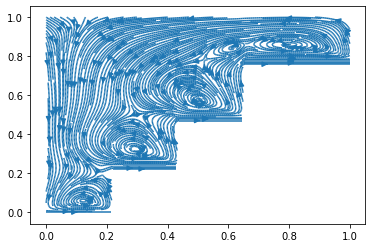

In [84]:
x=np.linspace(0,1,Nx)
y=np.linspace(0,1,Ny)
[X,Y]=np.meshgrid(x,y)
plt.streamplot(X,Y,u,v,density=5.0)
plt.show()

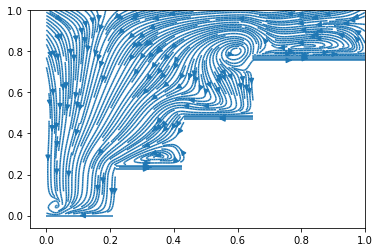

In [91]:
x=np.linspace(0,1,Nx)
y=np.linspace(0,1,Ny)
[X,Y]=np.meshgrid(x,y)
plt.streamplot(X,Y,u,v,density=4.0)
plt.show()

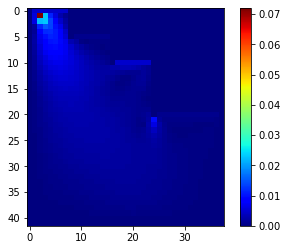

In [7]:
plt.imshow(np.sqrt(u**2+v**2),cmap='jet')
plt.colorbar()
plt.show()

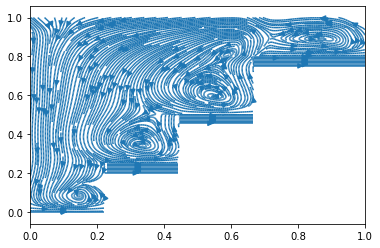

In [22]:
x=np.linspace(0,1,Nx)
y=np.linspace(0,1,Ny)
[X,Y]=np.meshgrid(x,y)
plt.streamplot(X,Y,u,v,density=5.0)
plt.show()

In [ ]:
# Ny=21
# Nx=19
# ##First step ends at
# Nx1=4
# ##Second step ends at
# Nx2=8
# Ny2=5
# ##Third step ends at
# Nx3=12
# Ny3=10
# ##Fourth step ends at
# Ny4=16

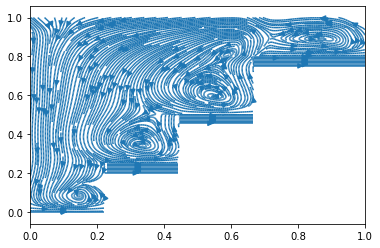

In [5]:
x=np.linspace(0,1,Nx)
y=np.linspace(0,1,Ny)
[X,Y]=np.meshgrid(x,y)
plt.streamplot(X,Y,u,v,density=5.0)
plt.show()

In [6]:
np.max(u)

0.001